In [7]:
#导入CNN所需的库
import tensorflow as tf
#导入其他库
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
import pandas as pd

train_path = "../data/train.csv"
train_data = pd.read_csv(train_path)
train_data
test_path = "../data/test.csv"
test_data = pd.read_csv(test_path)
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
features = train_data.columns.to_list()
del(features[0])
features

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 '

In [10]:
#导入data文件夹里的test.csv和train.csv里的数据
#train.csv里有42000行数据，test.csv里有28000行数据
#每行数据第一列是标签，后面784列是图片的像素值
#每张图片是28*28像素的灰度图
#标签是0-9的数字，代表图片上的数字
#像素值是0-255的数字，代表图片上每个像素的灰度值
#train.csv里的数据用于训练模型
#test.csv里的数据用于测试模型
train_data = np.loadtxt('../data/train.csv', delimiter=',', skiprows=1)
test_data = np.loadtxt('../data/test.csv', delimiter=',', skiprows=1)
#将训练数据里的标签和像素值分开
train_label = train_data[:, 0]
train_pixel = train_data[:, 1:]
test_pixel = test_data[:, 0:]

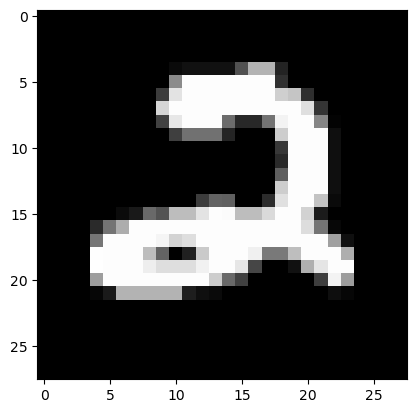

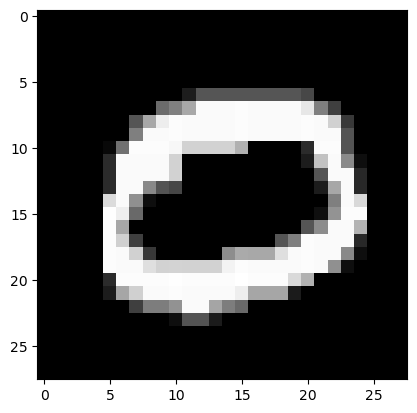

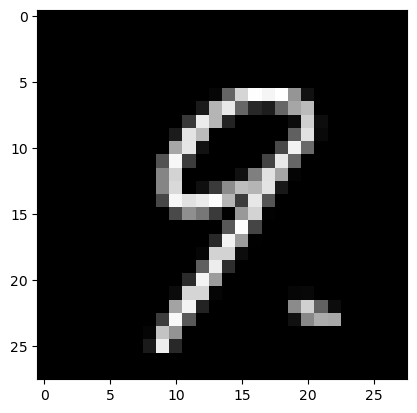

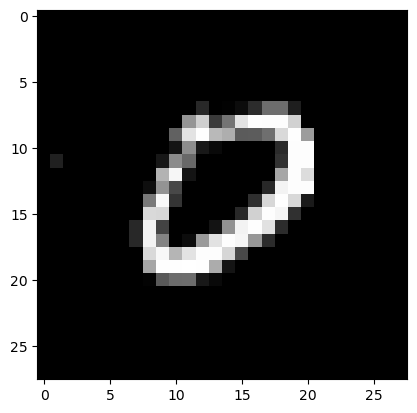

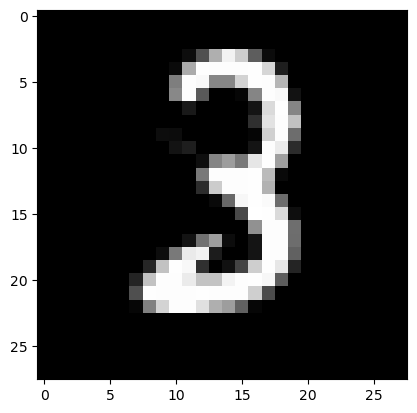

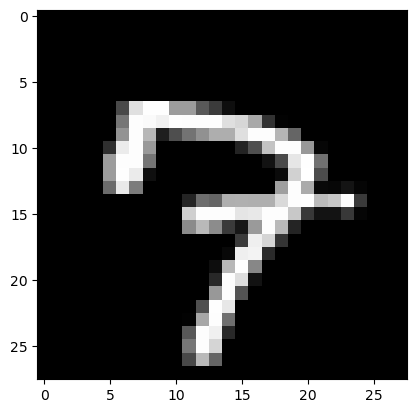

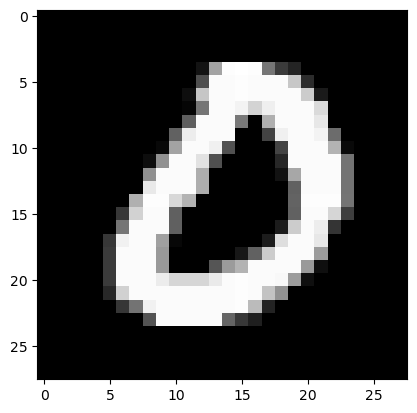

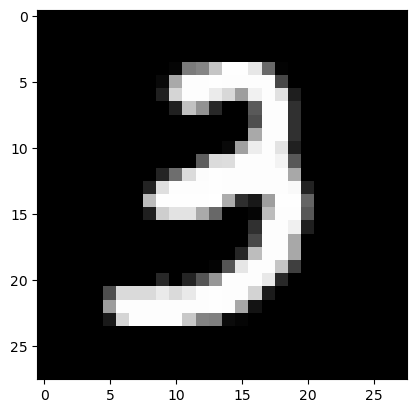

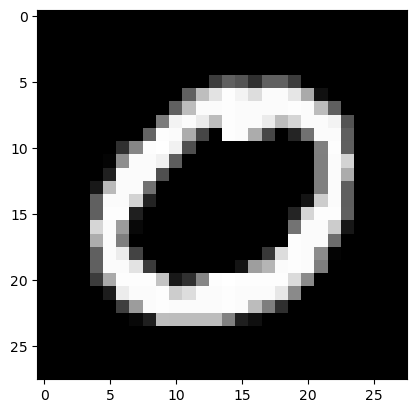

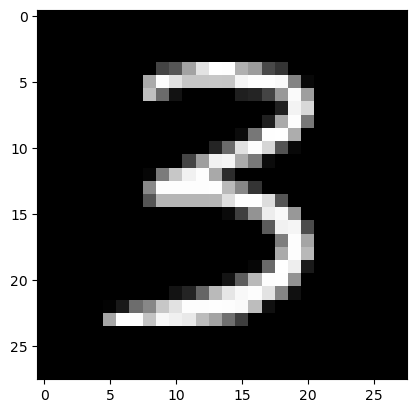

In [11]:
#定义一个函数，用于显示图片
def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()
#把test和train里的图片打印出来
for i in range(10):
    image = test_pixel[i].reshape(28, 28)
    show_image(image)


In [12]:
#使用卷积神经网络训练数据
#定义一个函数，用于训练模型
def train_model(train_pixel, train_label):
    #定义模型
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    #编译模型
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    #训练模型
    model.fit(train_pixel, train_label, epochs=5)
    return model
#训练模型
model = train_model(train_pixel, train_label)

Epoch 1/5
1313/1313 [==============================] - 104s 78ms/step - loss: 0.3578 - accuracy: 0.9291
Epoch 2/5
1313/1313 [==============================] - 102s 77ms/step - loss: 0.0735 - accuracy: 0.9779
Epoch 3/5
1313/1313 [==============================] - 102s 78ms/step - loss: 0.0540 - accuracy: 0.9833
Epoch 4/5
1313/1313 [==============================] - 107s 81ms/step - loss: 0.0447 - accuracy: 0.9863
Epoch 5/5
1313/1313 [==============================] - 106s 80ms/step - loss: 0.0406 - accuracy: 0.9880


875/875 [==============================] - 2s 2ms/step


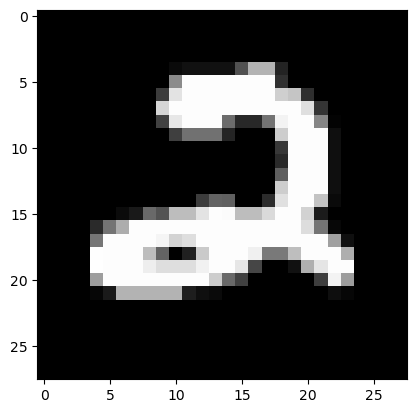

预测结果： 2


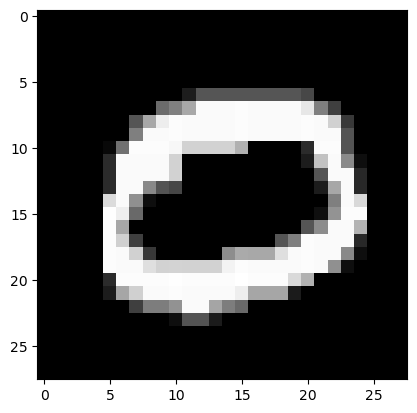

预测结果： 0


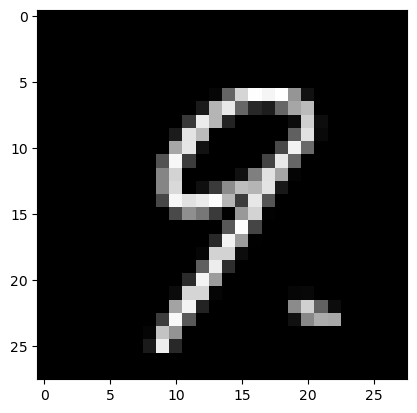

预测结果： 9


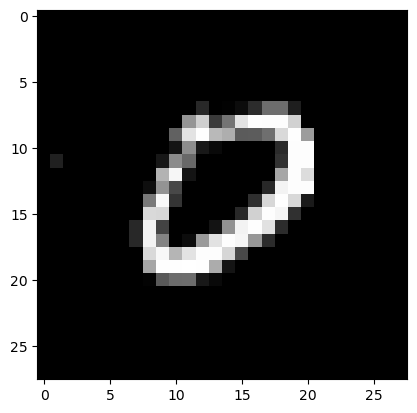

预测结果： 9


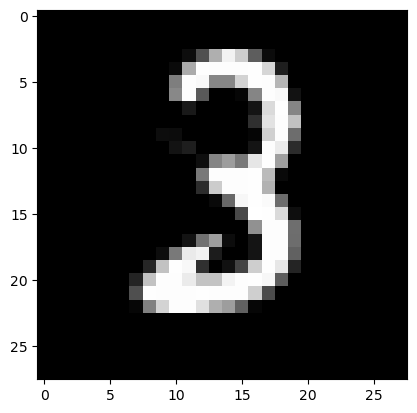

预测结果： 3


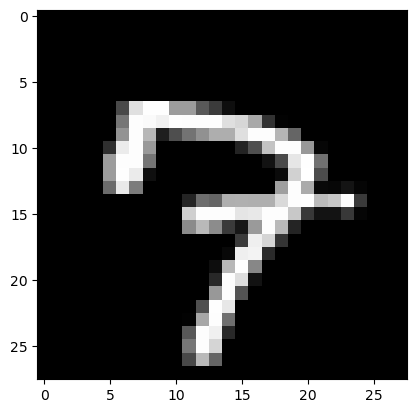

预测结果： 3


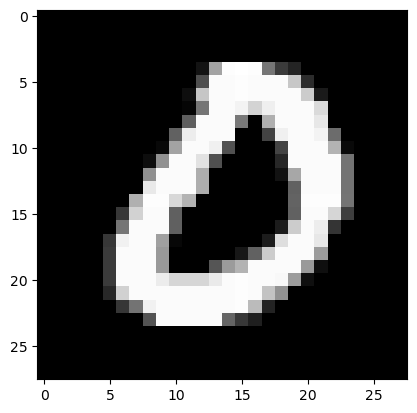

预测结果： 0


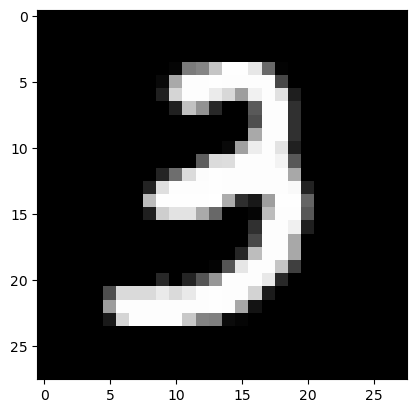

预测结果： 3


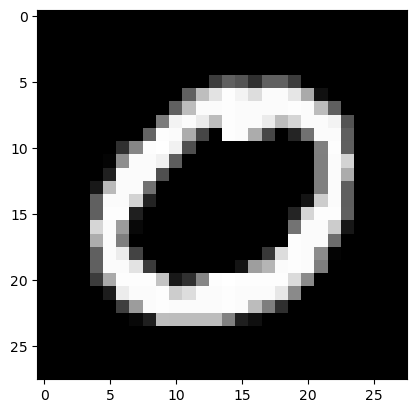

预测结果： 0


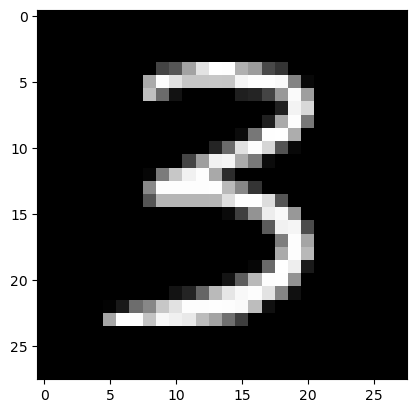

预测结果： 3


In [13]:
#使用模型对test.csv里的数据进行预测
#输出预测结果和图片
def predict(model, test_pixel):
    #对test.csv里的数据进行预测
    test_predict = model.predict(test_pixel)
    #输出预测结果和图片
    for i in range(10):
        image = test_pixel[i].reshape(28, 28)
        show_image(image)
        print('预测结果：', np.argmax(test_predict[i]))
#预测结果
predict(model, test_pixel)

In [15]:
model.save("../model/mnist_cnn.model")

INFO:tensorflow:Assets written to: ../model/mnist_cnn.model\assets


INFO:tensorflow:Assets written to: ../model/mnist_cnn.model\assets


1/1 [==============================] - 0s 26ms/step


Prediction for digit0 is: 9


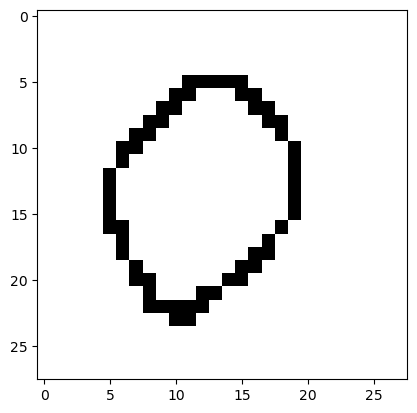

1/1 [==============================] - 0s 24ms/step
Prediction for digit1 is: 1


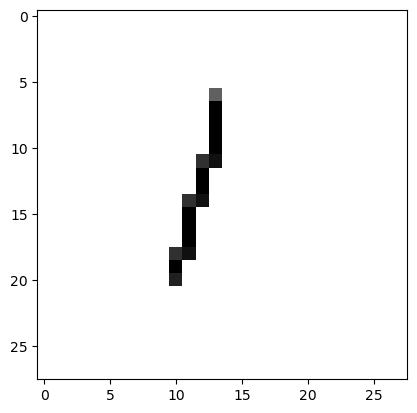

1/1 [==============================] - 0s 33ms/step
Prediction for digit2 is: 2


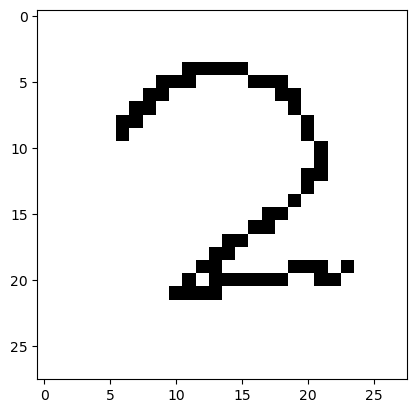

1/1 [==============================] - 0s 21ms/step
Prediction for digit3 is: 3


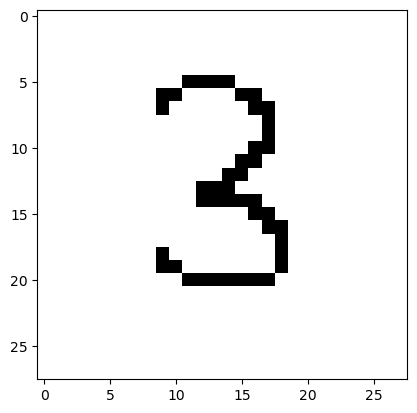

1/1 [==============================] - 0s 28ms/step
Prediction for digit4 is: 4


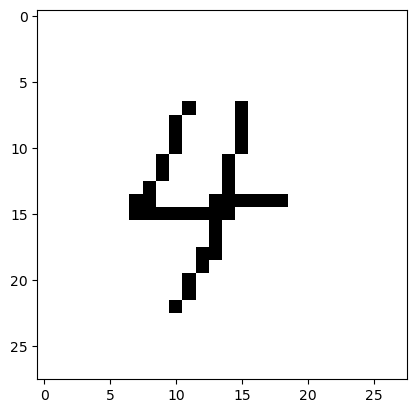

1/1 [==============================] - 0s 21ms/step
Prediction for digit5 is: 5


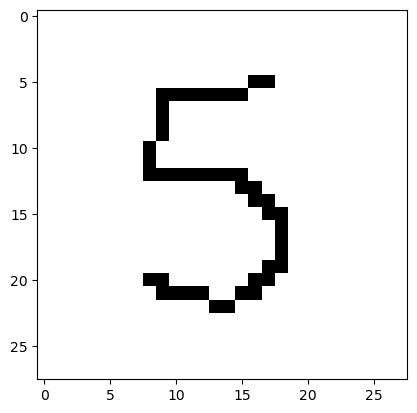

1/1 [==============================] - 0s 27ms/step
Prediction for digit6 is: 5


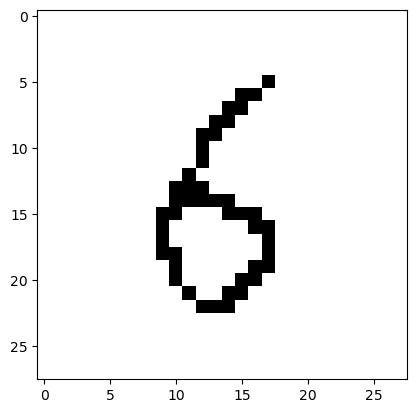

1/1 [==============================] - 0s 24ms/step
Prediction for digit7 is: 3


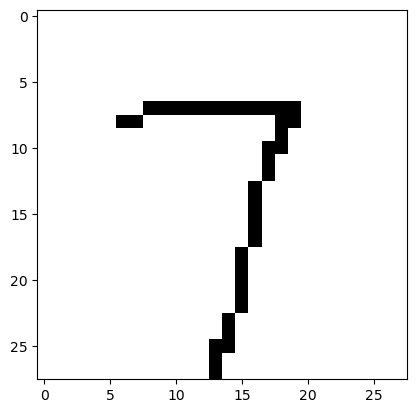

1/1 [==============================] - 0s 15ms/step
Prediction for digit8 is: 8


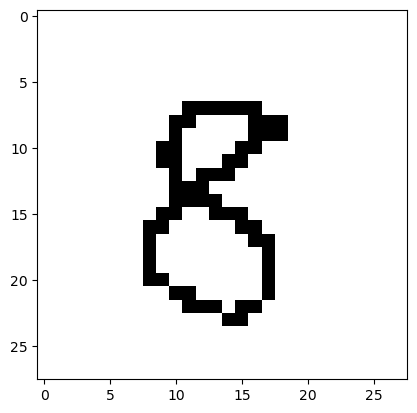

1/1 [==============================] - 0s 21ms/step
Prediction for digit9 is: 9


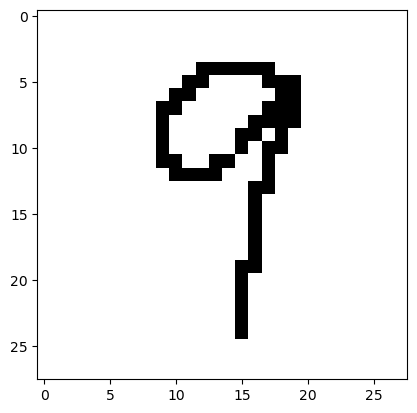

In [22]:
import cv2

test_digit = 0
while os.path.isfile(f"../data/test/digit{test_digit}.png"):
    try:
        digit = cv2.imread(f"../data/test/digit{test_digit}.png")[:,:,0]
        digit = np.invert([digit])
        prediction = model.predict(digit.reshape(-1, 784))
        print(f"Prediction for digit{test_digit} is: {np.argmax(prediction)}")
        plt.imshow(digit[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print(f"Error in digit{test_digit}")
    finally:
        test_digit += 1